In [75]:
# Task1 Hint: (with sample code for the SIFT detector)
# Initialize SIFT detector, detect keypoints, store and show SIFT keypoints of original image in a Numpy array
# Define parameters for SIFT initializations such that we find only 10% of keypoints
import cv2
import matplotlib.pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector



# Task2 Hint:
# Upscale the image, compute SIFT features for rescaled image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches

# Task3 Hint: (with sampe code for the rotation)
# Rotate the image and compute SIFT features for rotated image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches
import math
import numpy as np
import sys

# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center


In [76]:
# convert image to gray
image = cv2.imread("COMP9517_20T2_Lab2_Image.jpg")    
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


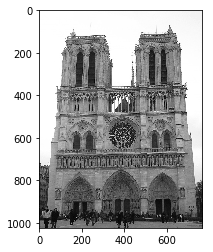

In [77]:
plt.imshow(img_gray,"gray")

In [78]:
sift = SiftDetector()   

In [79]:
# get detector 
detector = sift.get_detector(params = None)
detector

<xfeatures2d_SIFT 0x7fe3c197a530>

In [80]:
kp_t1a, des_t1a = detector.detectAndCompute(img_gray, None)

In [81]:
len(kp_t1a)

6233

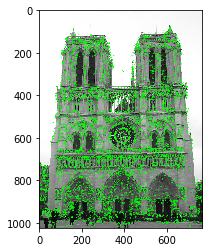

In [82]:
#draw keypoints，visualize
from copy import deepcopy
img_t1a = deepcopy(img_gray)
img_t1a = cv2.drawKeypoints(img_gray, kp_t1a, img_t1a, color = (0,255,0))
plt.imshow(img_t1a,"gray")

In [141]:
# Get a new sift detector with parameters detect less keypoints
# task1, b
myparams = {
    'n_features': 623,
    'n_octave_layers': 3,
    'contrast_threshold': 0.03,
    'edge_threshold': 10,
    'sigma': 1.6
}

new_sift = SiftDetector()
new_detector = new_sift.get_detector(params = myparams)
kp_t1b, des_t1b = new_detector.detectAndCompute(img_gray,None)
len(kp_t1b)

623

In [142]:
img_t1b = deepcopy(img_gray)
img_t1bb = cv2.drawKeypoints(img_gray, kp_t1b, img_t1b, color = (0,255,0))

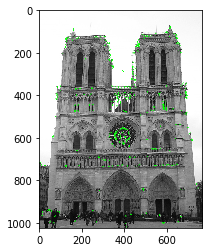

In [143]:
plt.imshow(img_t1bb,"gray")

In [144]:

#task2, a
height, width = int(img_gray.shape[0]*1.15), int(img_gray.shape[1]*1.15)
height

1177

In [145]:
width

883

In [146]:
img_t2a = cv2.resize(img_gray, dsize=(width, height), interpolation=cv2.INTER_NEAREST)
img_t2a.shape

(1177, 883)

In [147]:
image.shape

(1024, 768, 3)

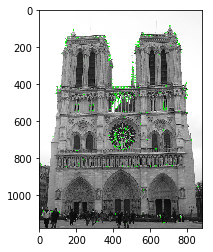

In [148]:
# task2, b,c
kp_t2b, des_t2b = new_detector.detectAndCompute(img_t2a, None)
img_t2b = deepcopy(img_t2a)
img_t2bb = cv2.drawKeypoints(img_t2a, kp_t2b, img_t2b, color=(0,255,0))
plt.imshow(img_t2bb,"gray")

In [149]:
len(kp_t2b)

623

In [ ]:
# task2,d
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_t1b, des_t2b, k =2)
good = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append([m])
goodres = sorted(good,key= lambda x:x[0].distance)
# nearest

img_t2d = cv2.drawMatchesKnn(img_gray,kp_t1b,img_t2a,kp_t2b,goodres[:5], None,flags=2)

# left is original size, right is the resized image
#there are two almost same, but it can ben seen clearler in the report.
cv2.imshow("t2d",img_t2d)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [104]:

#task3,a
center = get_img_center(img_gray)
center

(512, 384)

In [105]:
img_t3a = rotate(img_gray, center[0], center[1], -60)

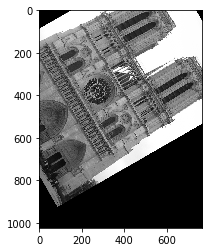

In [106]:
plt.imshow(img_t3a,"gray")

In [107]:
def rotate_better(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w / 2, h / 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

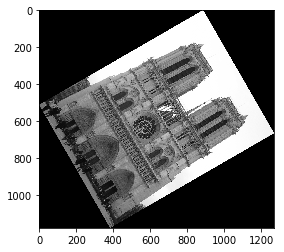

In [108]:
img_t3aa = rotate_better(img_gray, 60)
plt.imshow(img_t3aa,"gray")

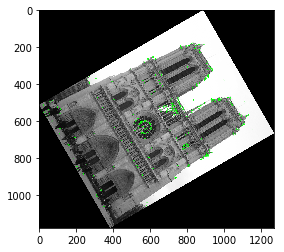

In [109]:
#task3,b,c

kp_t3b, des_t3b = new_detector.detectAndCompute(img_t3aa, None)
img_t3b = deepcopy(img_t3aa)
img_t3b = cv2.drawKeypoints(img_t3aa, kp_t3b, img_t3b, color=(0,255,0))
plt.imshow(img_t3b)


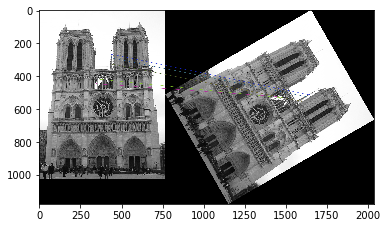

In [110]:
#task3,d
matcher = cv2.BFMatcher()
matches_3 = matcher.knnMatch(des_t1b, des_t3b, k = 2)
# nearest, two same
good3 = []
for m, n in matches_3:
    if m.distance < 0.75 * n.distance:
        good3.append([m])
good3 = sorted(good3,key= lambda x:x[0].distance)[:7]
img_t3d = cv2.drawMatchesKnn(img_gray,kp_t1b,img_t3aa,kp_t3b,good3,None,flags = 2)

# left is original size, right is the resized image
plt.imshow(img_t3d)

In [ ]:
cv2.imshow("res",img_t3d)
cv2.waitKey(0)
cv2.destroyAllWindows()